In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

In [2]:
from sklearn.linear_model import LinearRegression, Lasso #l2 regularization
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [4]:
data = pd.read_csv('gld_price_data.csv')
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
data.shape

(2290, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


EDA
1. Explore missing vals
2. Explore numeric and categorical attributes, and their distributions
3. Using Linear Regression, we'll check for independence, linearity, normality of data 

In [8]:
data.isnull().sum().sum()

0

In [9]:
num_cols = [each for each in data.columns if data[each].dtypes != 'object']
print(num_cols)

cat_cols = [each for each in data.columns if data[each].dtypes == 'object']
cat_cols

['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']


['Date']

In [10]:
#numeric values distinct value count
for each in num_cols:
    print(f"{each} :--> {len(data[each].unique())}")

SPX :--> 2277
GLD :--> 1930
USO :--> 1514
SLV :--> 1331
EUR/USD :--> 2066


Not really much unique values

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


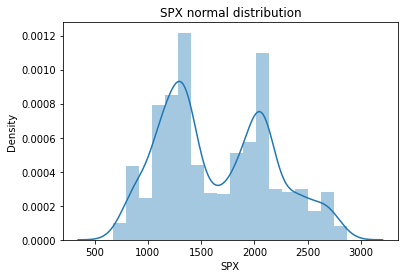

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


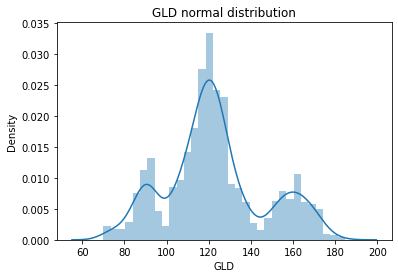

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


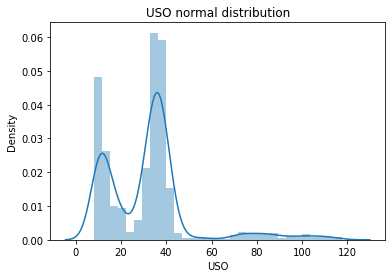

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


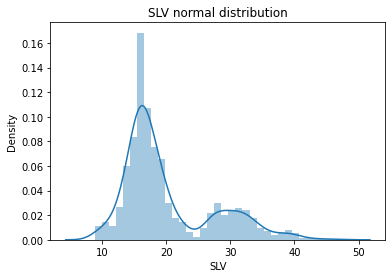

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


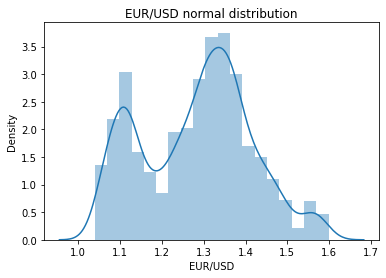

In [11]:
for each in num_cols:
    sns.distplot(data[each])
    plt.title(each + " normal distribution")
    plt.xlabel(each)
    plt.show()

Lets check the distribution with seaborn's countplot method

In [14]:
data.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


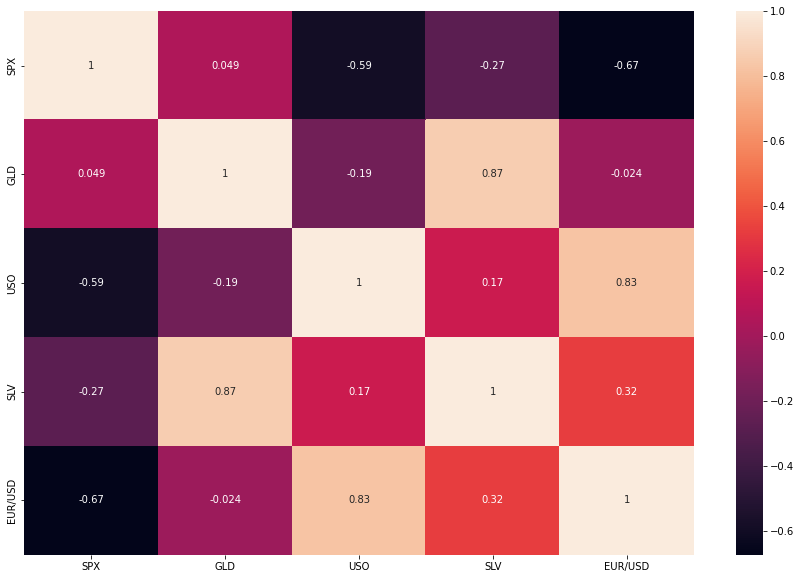

In [15]:
plt.figure(figsize = (15, 10))
sns.heatmap(data.corr(),annot = True)
plt.show()

In [16]:
x = data.corr()['GLD'].sort_values(ascending = False)
x

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64

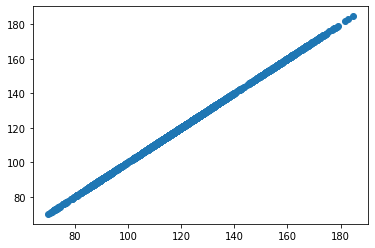

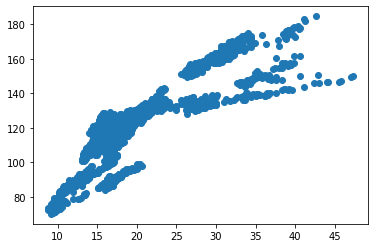

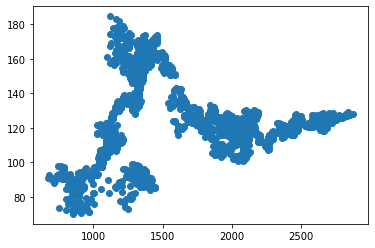

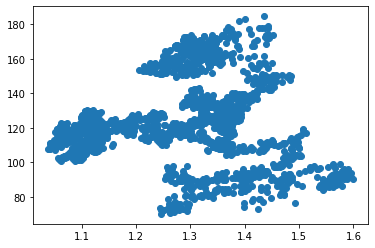

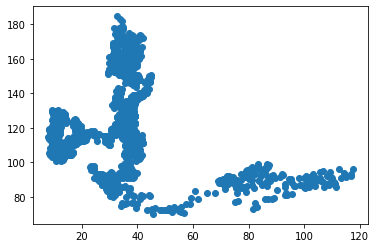

In [18]:
for each in x.index:
        plt.scatter(data[each], data['GLD'])
        plt.show()

Linearity with some attributes appear to be a tricky one.

In [20]:
X = data.drop(['Date', 'GLD'], axis = 1)
Y = data['GLD']


In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 97)

In [22]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1832, 4), (1832,), (458, 4), (458,))

Model Training and Building

In [23]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [24]:
lr_predtrain = lr.predict(x_train)
print(lr_predtrain[:10])
print(y_train[:10])

[117.78321524 156.48313589 116.96066563 122.34028235 106.53895597
 117.49331113 119.05022805 120.55858674 157.76369319 153.56304092]
1316    116.120003
1024    164.479996
1336    119.769997
1930    120.160004
421     110.209999
1617    116.330002
1378    123.389999
2194    119.730003
1065    167.139999
1122    161.570007
Name: GLD, dtype: float64


In [25]:
#lets chekc with our metrics
r2error = metrics.r2_score(y_train, lr_predtrain)
mae = metrics.mean_absolute_error(y_train, lr_predtrain)
mse = metrics.mean_squared_error(y_train, lr_predtrain)
rmse = np.sqrt(mse)

print(f'R squared error is {r2error}\nRoot mean squared error is {rmse}\nmean squared error is {mse}\n Mean absolute error {mae}')

R squared error is 0.8873415606561585
Root mean squared error is 7.915668179081606
mean squared error is 62.657802721325105
 Mean absolute error 5.879364641259331


 This looks quite good enough; 

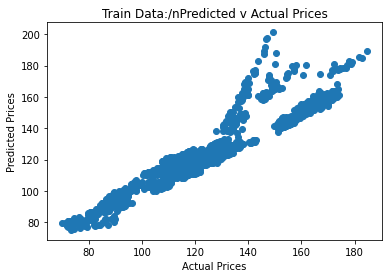

In [26]:
plt.scatter(y_train, lr_predtrain)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Train Data:/nPredicted v Actual Prices")
plt.show()

In [27]:
lr_testPred = lr.predict(x_test)
print(lr_testPred[:10])
print(y_test[:10])

[117.85958993 125.59549865 120.29982559  98.36985614 116.78459925
 102.33465792  87.64083352 127.28264162 149.51680066 153.92077393]
1833    117.739998
2016    118.080002
2068    116.040001
355      93.400002
1400    124.169998
358      97.459999
98       85.550003
1924    126.220001
820     159.460007
815     160.630005
Name: GLD, dtype: float64


In [28]:
r2error = metrics.r2_score(y_test, lr_testPred)
mae = metrics.mean_absolute_error(y_test, lr_testPred)
mse = metrics.mean_squared_error(y_test, lr_testPred)
rmse = np.sqrt(mse)

print(f'R squared error is {r2error}\nRoot mean squared error is {rmse}\nmean squared error is {mse}\n Mean absolute error {mae}')

R squared error is 0.8526578844238213
Root mean squared error is 8.428185757181613
mean squared error is 71.03431515755898
 Mean absolute error 6.156382041800382


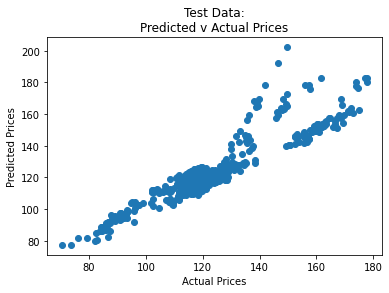

In [29]:
plt.scatter(y_test, lr_testPred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Test Data:\nPredicted v Actual Prices")
plt.show()

not bad, we will however try another model

Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(x_train, y_train)

RandomForestRegressor()

In [40]:
reg_predtrain = reg.predict(x_train)
print(reg_predtrain[:10])
print(y_train[:10])

[116.32260218 164.909197   119.20509805 120.30000258 110.3185992
 115.57310076 123.72469943 119.64160181 167.00559964 161.39830329]
1316    116.120003
1024    164.479996
1336    119.769997
1930    120.160004
421     110.209999
1617    116.330002
1378    123.389999
2194    119.730003
1065    167.139999
1122    161.570007
Name: GLD, dtype: float64


Instantly looks better from the onset; we hope it doesnt overfit though

In [41]:
r2error = metrics.r2_score(y_train, reg_predtrain)
mae = metrics.mean_absolute_error(y_train, reg_predtrain)
mse = metrics.mean_squared_error(y_train, reg_predtrain)
rmse = np.sqrt(mse)

print(f'R squared error is {r2error}\nRoot mean squared error is {rmse}\nmean squared error is {mse}\n Mean absolute error {mae}')

R squared error is 0.9985096879040523
Root mean squared error is 0.9104253218805698
mean squared error is 0.8288742667213391
 Mean absolute error 0.48360863651746516


In [42]:
reg_testPred = reg.predict(x_test)
print(reg_testPred[:10])
print(y_test[:10])

[118.54649972 118.93450091 118.08270064  94.83770081 123.54979994
  96.92680146  86.63529948 126.28660047 156.84870173 162.28070228]
1833    117.739998
2016    118.080002
2068    116.040001
355      93.400002
1400    124.169998
358      97.459999
98       85.550003
1924    126.220001
820     159.460007
815     160.630005
Name: GLD, dtype: float64


In [43]:
r2error = metrics.r2_score(y_test, reg_testPred)
mae = metrics.mean_absolute_error(y_test, reg_testPred)
mse = metrics.mean_squared_error(y_test, reg_testPred)
rmse = np.sqrt(mse)

print(f'R squared error is {r2error}\nRoot mean squared error is {rmse}\nmean squared error is {mse}\n Mean absolute error {mae}')

R squared error is 0.9890505978929587
Root mean squared error is 2.2975546523455703
mean squared error is 5.278757380514774
 Mean absolute error 1.3029865705676835


Random Forest Clearly Supersedes the Linear Regression Model

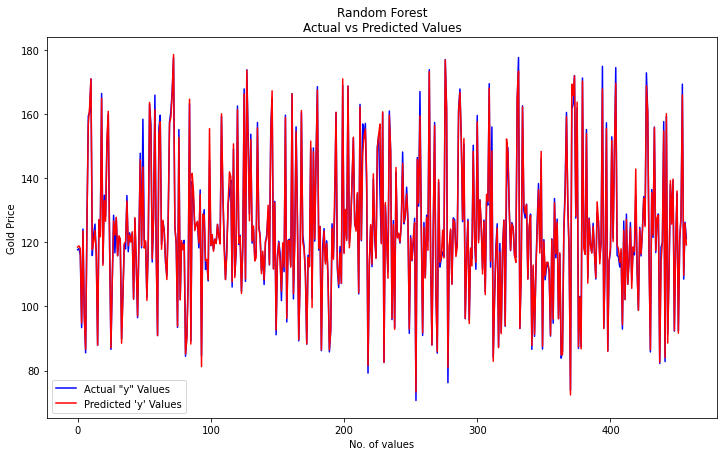

In [47]:
ylist = list(y_test)
plt.figure(figsize = (12, 7))
plt.plot(ylist, color = 'b', label = 'Actual "y" Values')
plt.plot(reg_testPred, color = 'r', label = "Predicted 'y' Values")
plt.title('Random Forest\nActual vs Predicted Values')
plt.xlabel('No. of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()